# UCB-VIアルゴリズムのリグレットの証明

参考
* [Reinforcement Learning: Theory and Algorithms](https://rltheorybook.github.io/)
* [Covering with $\varepsilon$-nets](https://erdogdu.github.io/csc2532/lectures/lecture05.pdf)
* [Notes on Exploration in Linear MDPs](https://nanjiang.cs.illinois.edu/files/cs542f22/note8.pdf)
* [Useful Inequalities Cheat Sheet](https://www.lkozma.net/inequalities_cheat_sheet/ineq.pdf)
* [Upper Bound of $\sum_{k=1}^{n} \frac{1}{\sqrt{k}}$](https://math.stackexchange.com/questions/3745324/upper-bound-of-sum-k-1n-frac1-sqrtk)
* [Upper Bound for Harmonic Number](https://proofwiki.org/wiki/Upper_Bound_for_Harmonic_Number)
* [講義スライド](https://wensun.github.io/CS6789_data_fall_2021/UCBVI_annotated.pdf)
* [Minimax Regret Bounds for Reinforcement Learning](https://arxiv.org/abs/1703.05449)
* [Near-optimal Regret Bounds for Reinforcement Learning](https://www.jmlr.org/papers/volume11/jaksch10a/jaksch10a.pdf)

[前回](UCB_regret_proof.ipynb)の拡張として、RLにおけるUCB-VIアルゴリズムの偽リグレットを簡潔に証明します。
今回の導出ではHigh-probability リグレットを考えますが、期待リグレットのは今回の導出について、$\delta$以下で成立するBadイベントを考えます。
面倒なので定数係数は全部$\square$でまとめます。

## Tabular MDP

次の問題設定を考えます。

問題設定

* エピソードの数：$K$
* $k$回目の方策：$\pi^k=\left\{\pi_0^k, \ldots, \pi_{H-1}^k\right\}$
* ホライズン：$H$
* 軌跡：$\tau^k=\left\{s_h^k, a_h^k\right\}_{h=0}^{H-1}$
* 行動：$a_h \sim \pi_h^k (s_h^k)$
* 遷移確率：$s_{h+1}^k \sim P^\star_h\left(\cdot \mid s_h^k, a_h^k\right)$
* 次状態遷移の回数：$N_h^k\left(s, a, s^{\prime}\right)=\sum_{i=0}^{k-1} \mathbf{1}\left\{\left(s_h^i, a_h^i, s_{h+1}^i\right)=\left(s, a, s^{\prime}\right)\right\}$
* 状態行動の訪問回数：$N_h^k(s, a)=\sum_{i=0}^{k-1} \mathbf{1}\left\{\left(s_h^i, a_h^i\right)=(s, a)\right\}, \forall h, s, a$.
* 遷移確率の推定：$\widehat{P}_h^k\left(s^{\prime} \mid s, a\right)=\frac{N_h^k\left(s, a, s^{\prime}\right)}{N_h^k(s, a)}, \forall h, s, a, s^{\prime}$.
* (偽)リグレット：$\sum_{k=0}^{K-1}\left(V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right)\right)$

### UCB-VIアルゴリズムの証明

\begin{aligned}
& \text { Algorithm } 5 \text { UCBVI } \\
& \text { Input: reward function } r \text { (assumed to be known), confidence parameters } \\
& \text { 1: for } k=0 \ldots K-1 \text { do } \\
& \text { 2: } \quad \text { Compute } \widehat{P}_h^k \text { as the empirical estimates, for all } h \\
& \text { 3: } \quad \text { Compute reward bonus } b_h^k \text { for all } \mathrm{h} \\
& \text { 4: } \quad \text { Run Value-Iteration on }\left\{\widehat{P}_h^k, r+b_h^k\right\}_{h=0}^{H-1} \\
& \text { 5: } \quad \text { Set } \pi^k \text { as the returned policy of VI. } \\
& \text { 6: end for }
\end{aligned}

さらにアルゴリズム特有の記法を導入します。

* $L:=\ln (S A H K / \delta)$
* ボーナス項：$b_h^k(s, a)=2 H \sqrt{\frac{L}{N_h^k(s, a)}}$
* 価値反復法：

\begin{equation}
\begin{aligned}
& \widehat{V}_H^k(s)=0, \forall s \\
& \widehat{Q}_h^k(s, a)=\min \left\{r_h(s, a)+b_h^k(s, a)+\widehat{P}_h^k(\cdot \mid s, a) \cdot \widehat{V}_{h+1}^k, H\right\} \\
& \widehat{V}_h^k(s)=\max _a \widehat{Q}_h^k(s, a), \pi_h^k(s)=\operatorname{argmax}_a \widehat{Q}_h^k(s, a), \forall h, s, a .
\end{aligned}
\end{equation}

これはモデルベースなアルゴリズムですね。
このアルゴリズムに対してリグレットの上界を証明していきます。

参考
* [Reinforcement Learning: Theory and Algorithms](https://rltheorybook.github.io/)



#### 1. 遷移確率の推定 (弱め)

ここの議論は次の資料が参考になります：
* [Near-optimal Regret Bounds for Reinforcement Learning](https://www.jmlr.org/papers/volume11/jaksch10a/jaksch10a.pdf)の式（４４）あたり
* [Minimax Regret Bounds for Reinforcement Learning](https://arxiv.org/abs/1703.05449)の６ページあたり

後で$\left|\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right) \cdot \widehat{V}_{h+1}^{\pi^k}\right|$をバウンドする必要があるので、推定した遷移確率の誤差のバウンドを確認しましょう。
ここで注意することがあります。
* $\widehat{P}_h^k$と$\widehat{V}_{h+1}^{\pi^k}$のどちらも確率変数。
    * $\widehat{V}_{h+1}^{\pi^k}$の計算に使うサンプルは$\widehat{P}_{h+1}^k$に依存しています。
        * $\widehat{P}_{h+1}^k$の計算の際に使ったサンプルは$s_{h, k}$に依存しています。
    * $\widehat{P}_{h}^k$の計算の際に使ったサンプルは全ての$(s, a)$について$N_h^k(s, a)$に依存しています。
        * $N_h^k(s, a)$は$s_{h, k}$に依存しています。
    * つまり、$\widehat{P}_h^k$と$\widehat{V}_{h+1}^{\pi^k}$は独立ではありません。
    * よって、独立ではない確率変数の積なので、$\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right) \cdot \widehat{V}_{h+1}^{\pi^k}$の期待値が０かどうかはわかりません。

なので普通にAzuma-Hoeffdingを使ってはいけないんですね。
その代わり、$\widehat{P}$に独立な任意の関数$f:\mathcal{S} \mapsto [0, H]$について、$\left|\left(\widehat{P}_h^k(\cdot \mid s, a)-P_h^{\star}(\cdot \mid s, a)\right)^{\top} f\right|$の上界を導出します。
まず定義より、
$$
\widehat{P}_h^k(\cdot \mid s, a)^{\top} f - {P}_h^\star(\cdot \mid s, a)^{\top} f =
\frac{1}{N_h^k(s, a)}
\sum_{i=0}^{k-1} \left(\mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} f\left(s_{h+1}^i\right)
- \mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} \mathbb{E}_{s^{\prime} \sim P_h^{\star}(s, a)} f\left(s^{\prime}\right)\right)
$$
です。


ここで、和の中身について、$X_i=\mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} f\left(s_{h+1}^i\right)-\mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} \mathbb{E}_{s^{\prime} \sim P_h^*}(s, a) f\left(s^{\prime}\right)$とします。
また、$\mathcal{H}_{h, <i}$を$h$での$i$を含まない$i$までの履歴とすると、決定的なアルゴリズムについては$\mathbb{E}\left[X_i \mid \mathcal{H}_{h, <i}\right]=0$なので、$\sum_{i=0}^{k-1} X_i$はマルチンゲールです。
また、$\left(s_h^i, a_h^i\right) \neq(s, a)$では$\left|X_i\right|=0$, $\left(s_h^i, a_h^i\right)=(s, a)$では$\left|X_i\right| \leq 2H$であることに気をつければ、
次のAzuma-Hoeffdingのバウンドが使えます：

---
**定理：Azuma-Hoeffdingの不等式**

$\left(\mathcal{F}_n\right)_{n=1}^N$に対して可測な実数値確率過程$\left(X_n\right)_{n=1}^N$を考える. 
$X_n \in\left[l_n, u_n\right]$ かつ $\mathbb{E}_n\left[X_n\right]=0$ が任意の$n$でa.s.で成立するとする. 
このとき、
$$
P\left(\sum_{n=1}^N X_n \geq \sqrt{\sum_{n=1}^N \frac{\left(u_n-l_n\right)^2}{2} \log \frac{1}{\delta}}\right) \leq \delta
$$

---

これを使うと、固定された$a$, $s$, $h$, $k$, そして$f$について、$1-\delta$以上で次が成立します。

$$
\left|\sum_{i=0}^{k-1} X_i\right|=
\left|\sum_{i=0}^{k-1} \left(\mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} f\left(s_{h+1}^i\right)
- \mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} \mathbb{E}_{s^{\prime} \sim P_h^{\star}(s, a)} f\left(s^{\prime}\right)\right)\right|
\leq \square H \sqrt{N_h^k(s, a) \ln (1 / \delta)}
$$

そして$s \in \mathcal{S}, a \in \mathcal{A}, h \in[0, \ldots, H-1], k \in[0, \ldots, K-1]$にUnion boundを取れば、任意の$s, a, h, k$について
$$
P\left(\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f - {P}_h^\star(\cdot \mid s, a)^{\top} f\right|\geq \square H \sqrt{\frac{\ln (SAKH / \delta)}{N_h^k(s, a)}}\right) \leq {\delta}
$$
です。

ここでまでの話では、まだ$f$についてのUnion boundを取っていません。バンディットの場合は$f$が報酬関数で固定されていたのでUnion Boundを取らなくても良かったわけですが、今回は$f$が$f:\mathcal{S} \mapsto [0, H]$で動き回ります。
一方で、この$f$は全部で$\infty$個存在するので、単純にUnion Boundを取ることができません。そこで、$\epsilon$-net法を使います。詳しくは[Covering with $\varepsilon$-nets](https://erdogdu.github.io/csc2532/lectures/lecture05.pdf)参照。

まず任意の$f: \mathcal{S} \mapsto[0, H]$について、$\|f\|_2 \leq H \sqrt{S}$であることに注意しましょう。
詳細は[Covering with $\varepsilon$-nets](https://erdogdu.github.io/csc2532/lectures/lecture05.pdf)に任せますが、このときどんな$f\in[0, H]^S$に対しても、$\left\|f-f^{\prime}\right\|_2 \leq \epsilon$を満たすような$f'\in \mathcal{N}_\varepsilon$が存在できる$\mathcal{N}_\varepsilon$のサイズは$\left|\mathcal{N}_\epsilon\right| \leq(1+2 H \sqrt{S} / \epsilon)^S$になります (リンク先のFigure2が分かりやすいです)。この$\mathcal{N}_\varepsilon$のサイズを``Covering Number``と呼びます。

これを使って$s, a, k, h, f \in \mathcal{N}_\varepsilon$についてUnion Boundを取ると、

$$
P\left(\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f' - {P}_h^\star(\cdot \mid s, a)^{\top} f'\right|\geq \square H \sqrt{\frac{\ln (SAKH(1+2 H \sqrt{S} / \epsilon) / \delta)}{N_h^k(s, a)}}\right) \leq {\delta}
$$

最後に任意の$f \in[0, H]^S$についてのバウンドに変形します。次のバウンドが確率$1-\delta$で成立します。

$$
\begin{aligned}
\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f - {P}_h^\star(\cdot \mid s, a)^{\top} f\right|
&=\left|
\widehat{P}_h^k(\cdot \mid s, a)^{\top} f' - {P}_h^\star(\cdot \mid s, a)^{\top} f'
+ \widehat{P}_h^k(\cdot \mid s, a)^{\top}(f - f')
+ \widehat{P}_h^\star(\cdot \mid s, a)^{\top}(f' - f)
\right|\\
&\leq\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f' - {P}_h^\star(\cdot \mid s, a)^{\top} f'\right|
+ \left|\widehat{P}_h^k(\cdot \mid s, a)^{\top}(f - f')\right|
+ \left|\widehat{P}_h^\star(\cdot \mid s, a)^{\top}(f' - f)\right|\\
&\leq \square H \sqrt{\frac{\ln (SAKH(1+2 H \sqrt{S} / \varepsilon) / \delta)}{N_h^k(s, a)}} + 2\varepsilon
\end{aligned}
$$

最後の不等式では$\|f-f^{\prime} \|_2 \leq \epsilon$ならば$\left|f(s)-f^{\prime}(s)\right| \leq \epsilon, \forall s \in \mathcal{S}$であることを使いました。([Useful Inequalities Cheat Sheet](https://www.lkozma.net/inequalities_cheat_sheet/ineq.pdf)のMean参照)

あとは$\varepsilon$を決めるだけです。
よく見ると$\varepsilon$は$\ln$の中で登場していますね。つまり、我々が対数の中身を気にしない限り、$\varepsilon$は多項式であれば何でも良いわけですね。
また、$N_h^k(s, a) \leq K$と上のバウンドで$1\varepsilon$が出てきていることも踏まえると、$\varepsilon=1/K$として良いでしょう。([Notes on Exploration in Linear MDPs](https://nanjiang.cs.illinois.edu/files/cs542f22/note8.pdf)を参考にしましたが、やや自信ないです。)

以上をまとめると、


$$
\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f - {P}_h^\star(\cdot \mid s, a)^{\top} f\right|
\leq \square H \sqrt{\frac{S \ln (S A K H(1+2 H K \sqrt{S}) / \delta)}{N_h^k(s, a)}}+\frac{\square}{K}
\leq \square H \sqrt{\frac{S \ln (H S K A / \delta)}{N_h^k(s, a)}},
$$

になり、これが欲しかったバウンドになります。

実はこれはそんなに良いバウンドではありません。が、Covering Numberは大事な概念なので載せておきました。

#### 2. 遷移確率＋$V^\star$の推定

ここでは$V^\star$が固定されていることを利用すれば、1.の議論からすぐに次の結果が得られます。
任意の$s, a, h, k$について
$$
P\left(\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} V_{h+1}^\star - {P}_h^\star(\cdot \mid s, a)^{\top} V^\star_{h+1}\right|\geq \square H \sqrt{\frac{\ln (SAKH / \delta)}{N_h^k(s, a)}}\right) \leq {\delta}
$$
が成り立ちます。

#### 3. $V^{\star}\left(s_0\right) \leq \widehat{V}^{k}\left(s_0\right)$の証明

* 条件：1.と2.のバウンドが成り立っているとき

リグレットをバウンドするために、UCBアルゴリズムと似たようなことをしていきます。

リグレットは
$\sum_{k=0}^{K-1}\left(V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right)\right)$だったので、
$V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right)$がバウンドできればほぼゴールです。

これをバウンドするためには、UCBのときと似た感じで
$V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right) \leq \widehat{V}^{k}\left(s_0\right)-V^{\pi^k}\left(s_0\right)$
が成り立つことを利用したいわけですね。

これは再帰的に確認できます。まず、$h=H$については
$\widehat{V}^k_H(s) = \widehat{V}^\star_H(s)=0$なのでOKです。$h+1$のときにOKだとすると、任意の$(s, a)\in \mathcal{S}\times \mathcal{A}$について、

$$
\begin{aligned}
\widehat{Q}_h^k(s, a)-Q_h^{\star}(s, a) & =b_h^k(s, a)+\widehat{P}_h^k(\cdot \mid s, a) \cdot \widehat{V}_{h+1}^k-P_h^{\star}(\cdot \mid s, a) \cdot V_{h+1}^{\star} \\
& \geq b_h^k(s, a)+\widehat{P}_h^k(\cdot \mid s, a) \cdot V_{h+1}^{\star}-P_h^{\star}(\cdot \mid s, a) \cdot V_{h+1}^{\star} \\
& =b_h^k(s, a)+\left(\widehat{P}_h^k(\cdot \mid s, a)-P_h^{\star}(\cdot \mid s, a)\right) \cdot V_{h+1}^{\star} \\
& \geq b_h^k(s, a)-\square H \sqrt{\frac{\ln (S A H K / \delta)}{N_h^k(s, a)}} \geq 0 .
\end{aligned}
$$

が成立します。

#### 4. $\sum_{k=0}^{K-1} \sum_{h=0}^{H-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}}$のバウンド

遷移確率のバウンドで出てきた$\frac{1}{\sqrt{N_h^k(s, a)}}$は後々バウンドしないといけません。今のうちにバウンドしておきましょう。

$$
\begin{aligned}
& \sum_{k=0}^{K-1} \sum_{h=0}^{H-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}}=\sum_{h=0}^{H-1} \sum_{k=0}^{K-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}}=\sum_{h=0}^{H-1} \sum_{s, a \in \mathcal{S} \times \mathcal{A}} \sum_{i=1}^{N_h^K(s, a)} \frac{1}{\sqrt{i}} \\
& \leq 2 \sum_{h=0}^{H-1} \sum_{s, a \in \mathcal{S} \times \mathcal{A}} \sqrt{N_h^K(s, a)} \leq \sum_{h=0}^{H-1} \sqrt{S A \sum_{s, a} N_h^K(s, a)}=H \sqrt{S A K},
\end{aligned}
$$

１つ目の不等式は[Upper Bound of $\sum_{k=1}^{n} \frac{1}{\sqrt{k}}$](https://math.stackexchange.com/questions/3745324/upper-bound-of-sum-k-1n-frac1-sqrtk)参考。２つ目の不等式はコーシー・シュワルツか平均の不等式を使います。[Useful Inequalities Cheat Sheet](https://www.lkozma.net/inequalities_cheat_sheet/ineq.pdf)参考。

#### 5. Simulation Lemmaを使って$\widehat{V}_0^k\left(s_0\right)-V_0^{\pi^k}\left(s_0\right)$をバウンド

* 条件：1.と2.のバウンドが成り立っているとき

1と2で求めたバウンドが成り立っている事象を考えているので、3の結果を使うと、

$$
V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right) \leq \widehat{V}_0^k\left(s_0\right)-V_0^{\pi^k}\left(s_0\right)
$$

が成り立っています。

ここで、Simulation Lemmaってやつでこれを更に深く掘り下げていきます（[講義スライド](https://wensun.github.io/CS6789_data_fall_2021/UCBVI_annotated.pdf)参照）

---
**補題：Simulation Lemma**
$$
\begin{aligned}
& \widehat{V}_0^n\left(s_0\right)-V_0^{\pi^n}\left(s_0\right)=\widehat{Q}_0^n\left(s_0, \pi^n\left(s_0\right)\right)-Q_0^{\pi^n}\left(s_0, \pi^n\left(s_0\right)\right) \\
& \leq r_0\left(s_0, \pi^n\left(s_0\right)\right)+b_h^n\left(s_0, \pi^n\left(s_0\right)\right)+\widehat{P}_0^n\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right) \cdot \widehat{V}_1^n-r_0\left(s_0, \pi^n\left(s_0\right)\right)-P_0\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right) \cdot V_1^{\pi^n} \\
& =b_h^n\left(s_0, \pi^n\left(s_0\right)\right)+\widehat{P}_0^n\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right) \cdot \widehat{V}_1^n-P_0\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right) \cdot V_1^{\pi^n} \\
& =b_h^n\left(s_0, \pi^n\left(s_0\right)\right)+\left(\widehat{P}_0^n\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right)-P_0\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right)\right) \cdot \widehat{V}_1^n+P_0\left(\cdot \mid s_0, \pi^n\left(s_0\right)\right) \cdot\left(\widehat{V}_1^n-V_1^{\pi^n}\right) \\
& =\sum_{h=0}^{H-1} \mathbb{E}_{s, a \sim d_h^n}\left[b_h^n(s, a)+\left(\widehat{P}_h^n(\cdot \mid s, a)-P_h(\cdot \mid s, a)\right) \cdot \widehat{V}_{h+1}^n\right]
\end{aligned}
$$

ここで、最初の不等式は$\widehat{V}$が$H$でclipされているせいです。

---

これを使って、

$$
V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right) \leq \widehat{V}_0^k\left(s_0\right)-V_0^{\pi^k}\left(s_0\right) \leq \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi^k}}\left[b_h^k\left(s_h, a_h\right)+\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right) \cdot \widehat{V}_{h+1}^{\pi^k}\right]
$$

を得ます。

#### 6. リグレットをバウンド

ここまで来たらリグレットをバウンドするだけですね。
5の結果の和の中身をバウンドしていきます。まず、定義よりボーナス項は$b_h^k(s, a)=2 H \sqrt{\frac{L}{N_h^k(s, a)}}$です。

一方で、
$$
\left|\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right) \cdot \widehat{V}_{h+1}^{\pi^k}\right| \leq\left\|\hat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right\|_1\left\|\widehat{V}_{h+1}^{\pi^k}\right\|_{\infty} \leq \square H \sqrt{\frac{S L}{N_h^k(s, a)}},
$$

が1の結果より出てきます。ここで、１つ目の不等式はHolderの不等式を使ってます。１で議論したように、直接Azuma-Hoeffdingを使ってはいけません。

最後に、

$$
\begin{aligned}
V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right) & \leq \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi^k}}\left[b_h^k\left(s_h, a_h\right)+\square H \sqrt{S L / N_h^k\left(s_h, a_h\right)}\right] \\
& \leq \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi_h^k}}\left[\square H \sqrt{S L / N_h^k\left(s_h, a_h\right)}\right] \\
& =\square H \sqrt{S L} \cdot \mathbb{E}\left[\sum_{h=0}^{H-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}} \mid \mathcal{H}_{<k}\right],
\end{aligned}
$$

なので、
$$
\begin{aligned}
\sum_{k=0}^{K-1} V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right)
&\leq\square H \sqrt{S L} \cdot \mathbb{E}\left[\sum_{k=0}^{K-1}\sum_{h=0}^{H-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}}\right]\\
&\leq\square H^2 S\sqrt{AK \ln (S A H K / \delta)}
\end{aligned}
$$
が成り立ちます。



#### 7.1. 遷移確率の推定 (強め)

実は１で証明した推定誤差のバウンドはそんなに良くありません。
１では$\widehat{P}_h^k(\cdot | s, a) - P_h^\star(\cdot|s, a)$の信頼区間をAzuma-Hoeffdingで導出していました。
これは$S$次元の信頼区間を作らないといけないので、代わりに$Q(s, a)$の信頼区間を導出します。こうすれば$1$次元の信頼区間になるためです。

この導出にはBernsteinの不等式を使います。さっそくやっていきましょう。

---
**定理：Azuma-Bernsteinの不等式**

$\left(\mathcal{F}_n\right)_{n=1}^N$に対して可測な実数値確率過程$\left(X_n\right)_{n=1}^N$を考える. 
$X_n \in\left[l_n, u_n\right]$ かつ $\mathbb{E}_n\left[X_n\right]=0$ が任意の$n$でa.s.で成立するとする. 
また，$V^{\prime}:=\sum_{n=1}^N \mathbb{E}_n\left[X_n^2\right]$とする。
このとき、

$$
\mathbb{P}\left(\sum_{n=1}^N X_n \geq \frac{u_n - l_n}{3} \log \frac{1}{\delta}+\sqrt{2 V \log \frac{1}{\delta}}\ \mathrm{ and } \ V^{\prime} \leq V\right) \leq \delta
$$


**UCB-VIの証明での直感（多分）**

先にAzuma-HoeffdingとAzuma-Bernsteinを使ったときの結果を比較しておきます

* Hoeffdingを使ったとき： 
    * $\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f - {P}_h^\star(\cdot \mid s, a)^{\top} f\right|\leq \square \sqrt{\frac{H^2SL}{N_h^k(s, a)}}$
    * $\sum_{h=0}^{H-1} \sum_{k=0}^{K-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}}=\sum_{h=0}^{H-1} \sum_{s, a \in \mathcal{S} \times \mathcal{A}} \sum_{i=1}^{N_h^K(s, a)} \frac{1}{\sqrt{i}} \leq H \sqrt{S A K}$

* Bernsteinを使ったとき： 
    * $\left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} f - {P}_h^\star(\cdot \mid s, a)^{\top} f\right|\leq \mathbb{E}_{s^{\prime} \sim P_h^{\star}(\cdot \mid s, a)} \frac{f\left(s^{\prime}\right)}{H}+\square\frac{H^2 S L}{N_h^k(s, a)}$
    * $\sum_{h=0}^{H-1} \sum_{k=0}^{K-1} \frac{1}{N_h^k\left(s_h^k, a_h^k\right)}=\sum_{h=0}^{H-1} \sum_{s, a \in \mathcal{S} \times \mathcal{A}} \sum_{i=1}^{N_h^K(s, a)} \frac{1}{i} \leq HSA \ln{(K)}$

Bernsteinの方の２個めのバウンドは[Upper Bound for Harmonic Number](https://proofwiki.org/wiki/Upper_Bound_for_Harmonic_Number)を使うと出てきます。

Bernsteinの方では第二項目は$\ln(K)$に比例するため、最終的には第一項目の$\mathbb{E}_{s^{\prime} \sim P_h^{\star}(\cdot \mid s, a)} \frac{f\left(s^{\prime}\right)}{H}$に関する項だけ気にすれば良くなります。
そして第一項目は最終的にボーナス項の和の形になり、$\sum_{h=0}^{H-1} \sum_{k=0}^{K-1} \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}}\leq H \sqrt{S A K}$っぽいものが出てきます。
つまりHoeffdingと比較すると、定数項を犠牲にして$\sqrt{S}$の係数を消しているわけですね。

---

以上を踏まえて、推定した遷移確率の誤差のバウンドを確認しましょう。
固定された$(s, a, k, h, s')$について、$\left|\widehat{P}_h^k(s' \mid s, a)-P_h^{\star}(s' \mid s, a)\right|$の上界を導出します(１では$s'$は$f$との内積で消していました)。
まず定義より、

$$
\begin{aligned}
\widehat{P}_h^k(s'\mid s, a) - {P}_h^\star(s' \mid s, a) &=
\frac{1}{N_h^k(s, a)}
\sum_{i=0}^{k-1} \left(\mathbf{1}\left\{s_h^i, a_h^i, s_{h+1}^i=s, a, s'\right\}
- \mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} \mathbb{E}_{s^{\prime\prime} \sim P_h^{\star}(s, a)} \mathbf{1}\left\{s''=s^{\prime}\right\}\right)\\
&=
\frac{1}{N_h^k(s, a)}
\sum_{i=0}^{k-1} \left(\mathbf{1}\left\{s_h^i, a_h^i, s_{h+1}^i=s, a, s'\right\}
- \mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} P_h^{\star}(s'|s, a)\right)\\
\end{aligned}
$$
です。


ここで、和の中身について、$X_i=\mathbf{1}\left\{s_h^i, a_h^i, s_{h+1}^i=s, a, s'\right\} - \mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} P_h^{\star}(s'|s, a)$とします。
また、$\mathcal{H}_{h, i}$を$h$での$i$を含む$i$までの履歴とすると、決定的なアルゴリズムについては$\mathbb{E}\left[X_i \mid \mathcal{H}_{h, i}\right]=0$なので、$\sum_{i=0}^{k-1} X_i$はマルチンゲールです。
また、$\left(s_h^i, a_h^i\right) \neq(s, a)$では$\left|X_i\right|=0$, $\left(s_h^i, a_h^i\right)=(s, a)$では$\left|X_i\right| \leq 1$であることに気をつけましょう。
そして、$X_i$の第二項目は$\mathcal{H}_{h, i}$が与えられたときは定数なので、$X_i$の分散を

$$
\mathbb{E}\left[X_i^2 \mid \mathcal{H}_{h, i}\right]=\mathbf{1}\left\{s_h^i, a_h^i=s, a\right\} P_h^{\star}\left(s^{\prime} \mid s, a\right)\left(1-P_h^{\star}\left(s^{\prime} \mid s, a\right)\right)
$$

として出すことができます(これはベルヌーイ分布の分散を考えると出ます)。
これをBernsteinの不等式に当てはめると、

$$
\begin{aligned}
\left|\widehat{P}_h^k(s'\mid s, a) - {P}_h^\star(s' \mid s, a)\right| & \leq \sqrt{\frac{2 P_h^{\star}\left(s^{\prime} \mid s, a\right)\left(1-P_h^{\star}\left(s^{\prime} \mid s, a\right)\right) \ln (1 / \delta)}{N_h^k(s, a)}}+\frac{2 \ln (1 / \delta)}{N_h^k(s, a)} \\
& \leq \square\sqrt{\frac{P_h^{\star}\left(s^{\prime} \mid s, a\right) \ln (1 / \delta)}{N_h^k(s, a)}}+\frac{\square\ln (1 / \delta)}{N_h^k(s, a)}
\end{aligned}
$$

最後に$s, a, h, k, s'$についてUnion Boundを取って、

$$
\left|\widehat{P}_h^k\left(s^{\prime} \mid s, a\right)-P_h^{\star}\left(s^{\prime} \mid s, a\right)\right| \leq \sqrt{\frac{2 P_h^{\star}\left(s^{\prime} \mid s, a\right) L}{N_h^k(s, a)}}+\frac{2 L}{N_h^k(s, a)},
$$

を得ます。

#### 7.2. 任意の$f$についての遷移確率のバウンド

まだ$f$については議論していなかったので、$f$が混ざったバウンドも導出します。
任意の$f:S\mapsto [0, H]$について、

$$
\begin{aligned}
& \left|\left(\widehat{P}_h^k(\cdot \mid s, a)-P_h^{\star}(\cdot \mid s, a)\right)^{\top} f\right| \\
& \leq \sum_{s^{\prime} \in \mathcal{S}}\left|\widehat{P}_h^k\left(s^{\prime} \mid s, a\right)-P_h^{\star}(\cdot \mid s, a)\right| f\left(s^{\prime}\right) \leq \sum_{s^{\prime} \in \mathcal{S}} \sqrt{\frac{2 L P_h^{\star}\left(s^{\prime} \mid s, a\right) f^2\left(s^{\prime}\right)}{N_h^k(s, a)}}+\sum_{s^{\prime} \in \mathcal{S}} \frac{2 L f\left(s^{\prime}\right)}{N_h^k(s, a)} \\
& \leq \sum_{s^{\prime} \in \mathcal{S}} \sqrt{\frac{2 L P_h^{\star}\left(s^{\prime} \mid s, a\right) f^2\left(s^{\prime}\right)}{N_h^k(s, a)}}+\frac{2 S H L}{N_h^k(s, a)} \leq \sqrt{S} \sqrt{\frac{\sum_{s^{\prime} \in \mathcal{S}} 2 L P_h^{\star}\left(s^{\prime} \mid s, a\right) f^2\left(s^{\prime}\right)}{N_h^k(s, a)}}+\frac{2 S H L}{N_h^k(s, a)} \\
& =\sqrt{\frac{2 H^2 S L}{N_h^k(s, a)} \cdot \frac{\sum_{s^{\prime} \in \mathcal{S}} P_h^{\star}\left(s^{\prime} \mid s, a\right) f^2\left(s^{\prime}\right)}{H^2}}+\frac{2 S H L}{N_h^k(s, a)} \leq \frac{H^2 S L}{N_h^k(s, a)}+\frac{\mathbb{E}_{s^{\prime} \sim P_h^{\star}(\cdot \mid s, a)} f^2\left(s^{\prime}\right)}{H^2}+\frac{2 S H L}{N_h^k(s, a)} \\
& \leq \frac{\mathbb{E}_{s^{\prime} \sim P_h^{\star}(\cdot \mid s, a)} f\left(s^{\prime}\right)}{H}+\frac{\square H^2 S L}{N_h^k(s, a)}
= \frac{\mathbb{E}_{s^{\prime} \sim P_h^{\star}(\cdot \mid s, a)} f\left(s^{\prime}\right)}{H}+\xi_h^i(s, a), \\
&
\end{aligned}
$$

が成り立ちます。
これは$\|f\|_\infty \leq H$やコーシー・シュワルツの不等式、そして$a b \leq\left(a^2+b^2\right) / 2$を使うと出てきます。
最後の等式では$\xi_h^i(s, a) := \frac{\square H^2 S L}{N_h^k(s, a)}$を導入しました。


#### 7.3. $f:=\widehat{V}_{h+1}^k-V_{h+1}^{\star}$のときのバウンド

このとき、7.2より

$$
\left|\left(\widehat{P}_h^k(\cdot \mid s, a)-P_h^{\star}(\cdot \mid s, a)\right)^{\top} f\right| \leq \frac{\mathbb{E}_{s^{\prime} \sim P_h^{\star}(\cdot \mid s, a)}\left(\widehat{V}_{h+1}^k\left(s^{\prime}\right)-V_{h+1}^{\star}\left(s^{\prime}\right)\right)}{H}+\xi_h^k(s, a)
$$

が成り立ってます。これを再帰的にバウンドしていきます。まず、丁寧に分解すると

$$
\begin{aligned}
\widehat{V}_{h+1}^k\left(s^{\prime}\right)-V_{h+1}^{\star}\left(s^{\prime}\right) \leq & \widehat{V}_{h+1}^k\left(s^{\prime}\right)-\left(r\left(s^{\prime}, \pi^k\left(s^{\prime}\right)\right)+P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top} V_{h+2}^{\star}\right) \\
\leq & r\left(s^{\prime}, \pi^k\left(s^{\prime}\right)\right)+\widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top} \widehat{V}_{h+2}^k-\left(r\left(s^{\prime}, \pi^k\left(s^{\prime}\right)\right)+P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top} V_{h+2}^{\star}\right) \\
= & \widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top} \widehat{V}_{h+2}^k-P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top} \widehat{V}_{h+2}^k+P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right) \\
= & \left(\widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)-P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right) \\
& +\left(\widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)-P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)\right)^{\top} V_{h+2}^{\star} \\
& +P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right)
\end{aligned}
$$

が出てきます(これはベルマン方程式などを丁寧にいじれば簡単にわかります)。

ここで、

1. 同じことをして、$\left(\widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)-P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right) \leq \frac{P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right)}{H}+\xi_{h+1}^k\left(s^{\prime}, \pi^k\left(s^{\prime}\right)\right)$
2. 2. 遷移確率＋$V^\star$の推定より$\left(\widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)-P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)\right)^{\top} V_{h+2}^{\star} \leq b_{h+1}^k\left(s^{\prime}, \pi^k\left(s^{\prime}\right)\right)$

なので、まとめると、

$$
\left(\widehat{P}_{h+1}^k\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)-P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right) \leq \frac{P_{h+1}^{\star}\left(\cdot \mid s^{\prime}, \pi^k\left(s^{\prime}\right)\right)^{\top}\left(\widehat{V}_{h+2}^k-V_{h+2}^{\star}\right)}{H}+\xi_{h+1}^k\left(s^{\prime}, \pi^k\left(s^{\prime}\right)\right) .
$$

が出てきます。

これを再帰的に繰り返すと、

$$
\begin{aligned}
\widehat{V}_{h+1}^k\left(s^{\prime}\right)-V_{h+1}^{\star}\left(s^{\prime}\right) & \leq \mathbb{E}\left[\sum_{\tau=h+1}^{H-1}\left(1+\frac{1}{H}\right)^{\tau-h-1}\left(\xi_\tau^k\left(s_\tau, a_\tau\right)+b_\tau^k\left(s_\tau, a_\tau\right)\right) \mid s_{h+1}=s^{\prime}, \pi^k\right] \\
& \leq e \mathbb{E}\left[\sum_{\tau=h+1}^{H-1}\left(\xi_\tau^k\left(s_\tau, a_\tau\right)+b_\tau^k\left(s_\tau, a_\tau\right)\right) \mid s_{h+1}=s^{\prime}, \pi^k\right],
\end{aligned}
$$

をえます。ここで、$(1+1 / H)^x \leq e$を使いました (これは$(1+1 / x)^x$が$x$について単調増加であることと、$e$の定義を考えるとすぐに出てきます)。

よって、

$$
\left|\left(\widehat{P}_h^k(\cdot \mid s, a)-P_h^{\star}(\cdot \mid s, a)\right)^{\top} \left(\widehat{V}_{h+1}^k-V_{h+1}^{\star}\right)\right| \leq \xi_h^k(s, a)+\frac{\square}{H} \mathbb{E}\left[\sum_{\tau=h+1}^{H-1}\left(\xi_\tau^k\left(s_\tau, a_\tau\right)+b_\tau^k\left(s_\tau, a_\tau\right)\right) \mid s_h=s, a_h=a, \pi^k\right]
$$

#### 7.4 リグレットの導出

あとは３で出した$V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right) \leq \widehat{V}_0^k\left(s_0\right)-V_0^{\pi^k}\left(s_0\right)$を使ってリグレットの形に直すだけです。
まずは３と7.3の結果を使って：

$$
\begin{aligned}
& V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right) \leq \widehat{V}_0^k\left(s_0\right)-V_0^{\pi^k}\left(s_0\right) \leq \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi k}}\left[b_h^k\left(s_h, a_h\right)+\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right) \cdot \widehat{V}_{h+1}^k\right] \\
&= \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi_h^k}}\left[b_h^k\left(s_h, a_h\right)+\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right)^{\top}\left(\widehat{V}_{h+1}^k-V_{h+1}^{\star}\right)+\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right)^{\top} V_{h+1}^{\star}\right] \\
& \leq \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi^k}}\left[2 b_h^k\left(s_h, a_h\right)+\left(\widehat{P}_h^k\left(\cdot \mid s_h, a_h\right)-P^{\star}\left(\cdot \mid s_h, a_h\right)\right)^{\top}\left(\widehat{V}_{h+1}^k-V_{h+1}^{\star}\right)\right] \\
& \leq \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^{\pi^k}}\left[2 b_h^k\left(s_h, a_h\right)+\xi_h^k\left(s_h, a_h\right)+\frac{e}{H} \mathbb{E}\left[\sum_{\tau=h+1}^{H-1}\left(\xi_\tau^k\left(s_\tau, a_\tau\right)+b_\tau^k\left(s_\tau, a_\tau\right)\right) \mid \pi^k\right]\right] \\
& \leq e \sum_{h=0}^{H-1} \mathbb{E}_{s_h, a_h \sim d_h^\pi}\left[2 b_h^k\left(s_h, a_h\right)+\xi_h^k\left(s_h, a_h\right)\right]
= e \mathbb{E}\left[\sum_{k=0}^{K-1} \sum_{h=0}^{H-1}\left[2 b_h^k\left(s_h^k, a_h^k\right)+\xi_h^k\left(s_h^k, a_h^k\right)\right]\right]
\end{aligned}
$$

が成り立ちます。

そして、

* $\sum_{k=0}^{K-1} \sum_{h=0}^{H-1} 2 b_h^k\left(s_h^k, a_h^k\right) \leq 4 H \sqrt{L} \sum_k \sum_h \frac{1}{\sqrt{N_h^k\left(s_h^k, a_h^k\right)}} \leq 8 H^2 \sqrt{S A K L}$.
* $\begin{aligned} \sum_{k=0}^{K-1} \sum_{h=0}^{H-1} \xi_h^k\left(s_h^k, a_h^k\right) & =2 H^2 S L \sum_{k=0}^{K-1} \sum_{h=0}^{H-1} \frac{1}{N_h^k\left(s_h^i, a_h^k\right)}=2 H^2 S L \sum_{h=0}^{H-1} \sum_{s, a} \sum_{i=1}^{N_h^K(s, a)} \frac{1}{i} \\ & \leq 2 H^2 S A L H S \ln (K)=2 H^3 S^2 A L \ln (K),\end{aligned}$

が簡単に出せるので、最終的なリグレットは $\tilde{O}\left(H^2 \sqrt{S A K}+H^3 S^2 A\right)$になります。

完成！実験してみましょう。[reward_free_RL.ipynb](reward_free_RL.ipynb)で使ったDouble Chain MDPを使います。

In [2]:
import numpy as np
from functools import partial
from typing import Optional, NamedTuple
import jax.numpy as jnp

def create_rew_P(S: int, A: int):
    """ double_chain MDP (報酬関数, 遷移確率) を作成します
    詳しくは６章参照

    Args:
        S (int): 状態空間のサイズ
        A (int): 行動空間のサイズ

    Returns:
        rew (float): 報酬関数
        P (float): 遷移確率
    """
    assert A == 2

    # 一番右側の状態で1がもらえます
    rew = np.zeros((S, 2))
    rew[-1] = 1.0

    # 1を選ぶと右に, 0を選ぶと左に動きます。0.1の確率で逆方向に動きます。
    P = np.zeros((S, A, S))
    for s in range(S):
        P[s, 0, max(0, s-1)] = 0.9 
        P[s, 0, min(s+1, S-1)] = 0.1 

        P[s, 1, max(0, s-1)] = 0.1 
        P[s, 1, min(s+1, S-1)] = 0.9 
    np.testing.assert_almost_equal(P.sum(axis=-1), 1)
    return jnp.array(rew), jnp.array(P)


class MDP(NamedTuple):
    S_array: np.array  # 状態空間
    A_array: np.array  # 行動空間
    gamma: float  # 割引率
    horizon: int  # ホライゾン
    rew: float  # 報酬関数
    P: float  # 遷移確率
    optimal_Q: Optional[np.ndarray] = None  # 最適Q値
    optimal_Q_idx: Optional[np.ndarray] = None  # 後でplot用に使います

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_array)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_array)


S = 30
A = 2
S_array = np.arange(S)
A_array = np.arange(A)
gamma = 1
horizon = 20

# Double chain MDP を作ります
rew, P = create_rew_P(S, A)
double_chain = MDP(S_array, A_array, gamma, horizon, rew, P)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


# 実験に便利な関数

実験の前に、いくつか便利な関数を導入します。

1. ``compute_greedy_policy``: Q関数 ($S \times A \to \mathcal{R}$) の貪欲方策を返します
2. ``compute_optimal_Q``: MDPの最適Q関数 $q_* : S \times A \to \mathcal{R}$ を返します。
3. ``compute_policy_Q``: 方策 $\pi$ のQ関数 $q_\pi : S \times A \to \mathcal{R}$ を返します。
4. ``compute_optimality_gap``: 方策 $\pi$ と最適解との差 $\|q_* - q_{\pi}\|_\infty$ を返します。この値が小さいほど、$\pi$ はほぼ全ての状態行動対で最適な方策になっています。
5. ``sample_next_state``: $(s, a)$の次の状態をサンプルします。
6. ``sample_eps_greedy_act``: 与えられたQ値から、epsilon-greedy方策に従って行動を返します

In [3]:
import jax
from functools import partial
from tqdm import tqdm
import random


# >>>> 1 >>>>
@jax.jit
def compute_greedy_policy(Q: np.ndarray):
    greedy_policy = jnp.zeros_like(Q)
    S, A = Q.shape
    greedy_policy = greedy_policy.at[jnp.arange(S), Q.argmax(axis=1)].set(1)
    assert greedy_policy.shape == (S, A)
    return greedy_policy
# <<<< 1 <<<<


# >>>> 2 >>>>
@partial(jax.jit, static_argnames=("S", "A"))
def _compute_optimal_Q(mdp: MDP, S: int, A: int):

    def backup(optimal_Q):
        greedy_policy = compute_greedy_policy(optimal_Q)
        max_Q = (greedy_policy * optimal_Q).sum(axis=1)
        next_v = mdp.P @ max_Q
        assert next_v.shape == (S, A)
        return mdp.rew + mdp.gamma * next_v
    
    optimal_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon, body_fn, optimal_Q)

compute_optimal_Q = lambda mdp: _compute_optimal_Q(mdp, mdp.S, mdp.A)
# <<<< 2 <<<<


# >>>> 3 >>>>
def compute_policy_Q(mdp: MDP, policy: np.ndarray):
    S, A = policy.shape

    def backup(policy_Q):
        max_Q = (policy * policy_Q).sum(axis=1)
        next_v = mdp.P @ max_Q
        assert next_v.shape == (S, A)
        new_Q = mdp.rew + mdp.gamma * next_v
        return jnp.minimum(mdp.horizon, new_Q)
    
    policy_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon, body_fn, policy_Q)
# <<<< 3 <<<<


# >>>> 4 >>>>
@jax.jit
def compute_optimality_gap(mdp: MDP, policy: np.ndarray):
    policy_Q = compute_policy_Q(mdp, policy)
    optimality_gap = jnp.abs(mdp.optimal_Q - policy_Q).max()
    return optimality_gap
# <<<< 4 <<<<


# >>>> 5 >>>>
def sample_next_state(mdp: MDP, s: int, a: int):
    """ sample next state according to the transition matrix P
    Args:
        mdp: MDP
        s: int
        a: int
    Returns:
        next_s: int
    """
    probs = np.array(mdp.P[s, a])
    return np.random.choice(mdp.S_array, p=probs)
# <<<< 5 <<<<


# >>>> 6 >>>>
def sample_eps_greedy_act(mdp: MDP, q_s: np.array, eps: float):
    if random.random() < eps:
        return random.randint(0, mdp.A-1)
    else:
        return q_s.argmax()
# <<<< 6 <<<<

double_chain = double_chain._replace(optimal_Q=compute_optimal_Q(double_chain))

In [4]:
import matplotlib.pyplot as plt

 
def EpsilonGreedyVI(mdp: MDP, K: int):
    S, A, H = mdp.S, mdp.A, mdp.horizon

    # MDPが定常なのでHは省略します
    visit_SA = np.zeros((S, A))
    visit_SAS = np.zeros((S, A, S))
    P_approx = np.ones((S, A, S)) / S
    policy = np.ones((S, A)) / A

    init_s = int((mdp.S - 1) / 2)
    optimal_V = mdp.optimal_Q[init_s].max()
    regrets = []
    regret = 0

    for k in tqdm(range(K)):
        s = init_s

        # 探索をします　
        for h in range(H):
            a = np.random.randint(A)
            visit_SA[s, a] += 1
            next_s = sample_next_state(mdp, s, a)
            visit_SAS[s, a, next_s] += 1
            P_approx[s, a] = visit_SAS[s, a] / visit_SA[s, a]
            s = next_s

        # 方策を更新します
        mdp_approx = mdp._replace(P=P_approx, rew=mdp.rew)
        mdp_approx = mdp_approx._replace(optimal_Q=compute_optimal_Q(mdp_approx))
        policy = compute_greedy_policy(mdp_approx.optimal_Q)

        # リグレットを計算します
        policy_V = compute_policy_Q(mdp, policy)[init_s].max()
        regret += optimal_V - policy_V
        regrets.append(regret)

    return regrets, visit_SA


 
def UCB_VI(mdp: MDP, delta: float, K: int):
    S, A, H = mdp.S, mdp.A, mdp.horizon
    L = np.log(S*A*H*K / delta)

    # MDPが定常なのでHは省略します
    visit_SA = np.zeros((S, A))
    visit_SAS = np.zeros((S, A, S))
    P_approx = np.ones((S, A, S)) / S
    policy = np.ones((S, A)) / A

    init_s = int((mdp.S - 1) / 2)
    optimal_V = mdp.optimal_Q[init_s].max()
    regrets = []
    regret = 0

    for k in tqdm(range(K)):
        s = init_s

        # 探索をします　
        for h in range(H):
            a = sample_eps_greedy_act(mdp, policy[s], 0)
            visit_SA[s, a] += 1
            next_s = sample_next_state(mdp, s, a)
            visit_SAS[s, a, next_s] += 1
            P_approx[s, a] = visit_SAS[s, a] / visit_SA[s, a]
            s = next_s

        # 方策を更新します
        # 0.1はbonusが大きくなりすぎるのを防ぐためです。
        bonus = 0.1 * H * np.sqrt(L / (visit_SA + 1e-3))  # 1e-3はzero division errorを防ぐためです
        mdp_approx = mdp._replace(P=P_approx, rew=mdp.rew + bonus)
        mdp_approx = mdp_approx._replace(optimal_Q=compute_optimal_Q(mdp_approx))
        policy = compute_greedy_policy(mdp_approx.optimal_Q)

        # リグレットを計算します
        policy_V = compute_policy_Q(mdp, policy)[init_s].max()
        regret += optimal_V - policy_V
        regrets.append(regret)

    print(bonus.max())
    return regrets, visit_SA


delta = 0.1
K = 1000
eps_greedy_regrets, eps_greedy_visit_SA = EpsilonGreedyVI(double_chain, K)
ucb_regrets, ucb_visit_SA = UCB_VI(double_chain, delta, K)


100%|██████████| 1000/1000 [00:38<00:00, 26.16it/s]

1.8055249778189661


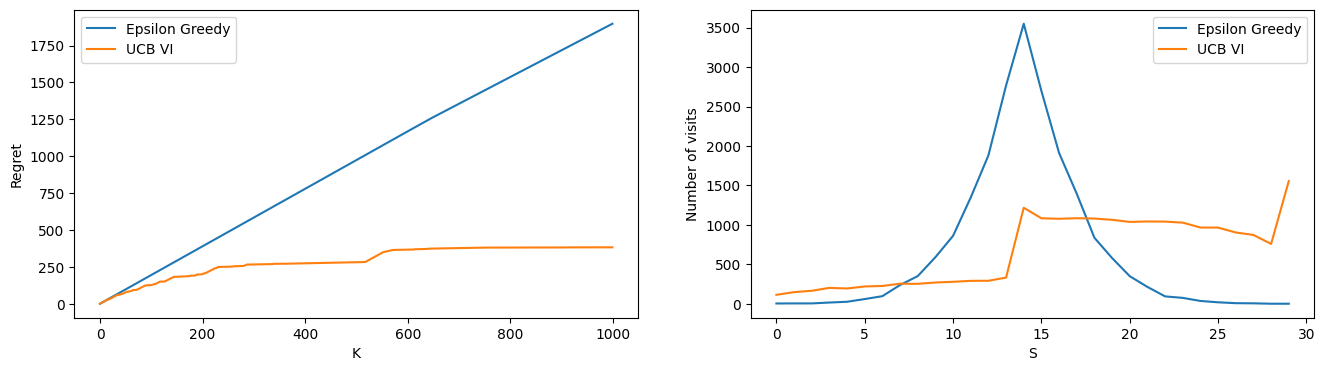

In [5]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(eps_greedy_regrets, label="Epsilon Greedy")
plt.plot(ucb_regrets, label="UCB VI")
plt.ylabel("Regret")
plt.xlabel("K")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(eps_greedy_visit_SA.sum(axis=1), label="Epsilon Greedy")
plt.plot(ucb_visit_SA.sum(axis=1), label="UCB VI")
plt.ylabel("Number of visits")
plt.xlabel("S")
plt.legend()